<a href="https://colab.research.google.com/github/Victoria65304/ESMT_IML/blob/main/Take_Home_Assignment_VictoriaLandazuri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Genre Classification Using Machine Learning
## Predicting music genres based on audio features from Spotify data

---

## Table of Contents:

### 1. Problem Statement
   - Objective: Classify songs into genres using audio features

### 2. Data Loading & Initial Overview
   - Dataset source and loading
   - Data structure and dimensions
   - Column identification

### 3. Exploratory Data Analysis (EDA)
   3.1 Data Quality Check
   - Missing values analysis
   - Duplicate detection
   - Data types verification
   
   3.2 Target Variable Analysis
   - Genre distribution
   - Class balance assessment
   
   3.3 Feature Analysis
   - Audio features identification
   - Statistical summary
   - Feature distributions
   
   3.4 Correlation Analysis
   - Correlation matrix heatmap
   - Multicollinearity detection
   
   3.5 EDA Summary & Hypotheses

### 4. Data Preprocessing
   - Feature selection (audio features only)
   - Train/test split (80/20)
   - Feature scaling (StandardScaler)

### 5. Model Training & Evaluation
   5.1. Algorithm 1: Random Forest

   5.2 Algorithm 2: Logistic Regression

   5.3 Algorithm 3: XGBoost

### 6. Model Performance Comparison
   - Accuracy comparison
   - Confusion matrices
   - ROC curves (if applicable)
   - Classification reports

### 7. Explainable AI (XAI) Analysis
   - Feature importance analysis
   - Confusion matrix interpretation
   - SHAP values (optional advanced)

### 8. Advanced Experiments (Phase 2)
   - Adding artist features
   - Adding album features
   - Performance improvement analysis

### 9. Discussion & Recommendations
   - Summary of findings
   - Best performing algorithm
   - Genre classification insights
   - Limitations and future work

### 10. Conclusions

### 11. References & Acknowledgments

# 2. Data Loading & Initial Overview



In [1]:
import pandas as pd
import os

Importing datasets:

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.
Path to dataset files: /kaggle/input/spotify-tracks-genre-dataset


In [3]:
import kagglehub

# Re-download the dataset
path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")
print(f"Dataset downloaded to: {path}")

Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.
Dataset downloaded to: /kaggle/input/spotify-tracks-genre-dataset


In [4]:
import pandas as pd
import os

# The dataset was downloaded here
dataset_path = '/kaggle/input/spotify-tracks-genre-dataset'

csv_file = os.path.join(dataset_path, 'train.csv')  # Change this filename if needed

# Load the data
spotify_df = pd.read_csv(csv_file)


In [5]:
spotify_df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
# See all column names
print("Column names in the dataset:")
print(spotify_df.columns.tolist())

Column names in the dataset:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [7]:
# Check the size of the dataset
print(f"Number of rows (tracks): {spotify_df.shape[0]}")
print(f"Number of columns: {spotify_df.shape[1]}")

Number of rows (tracks): 114000
Number of columns: 21


In [8]:
# Check data types
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

 # 3. Exploratory Data Analysis (EDA)
    3.1 Data Quality Check

In [9]:
# Check for missing values
print("Missing values per column:")
print("="*50)
missing = spotify_df.isnull().sum()
print(missing)
print(f"\nTotal missing values: {missing.sum()}")

Missing values per column:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Total missing values: 3


In [10]:
# Check for duplicate rows
duplicates = spotify_df.duplicated().sum()
duplicates

np.int64(0)

In [11]:
# Check unique genres
print(f"Number of unique genres: {spotify_df['track_genre'].nunique()}")
print("\nAll genres in the dataset:")
print(spotify_df['track_genre'].unique())

Number of unique genres: 114

All genres in the dataset:
['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rocka

    3.2 Target Variable Analysis


In [12]:
# Count tracks per genre
genre_counts = spotify_df['track_genre'].value_counts()
print("Top 10 most common genres:")
print(genre_counts.head(10))
print("\nBottom 10 least common genres:")
print(genre_counts.tail(10))

Top 10 most common genres:
track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
anime          1000
black-metal    1000
bluegrass      1000
blues          1000
brazil         1000
Name: count, dtype: int64

Bottom 10 least common genres:
track_genre
spanish        1000
study          1000
swedish        1000
synth-pop      1000
tango          1000
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, dtype: int64



    3.3 Feature Analysis




    

In [13]:
# List all numerical features (exclude metadata and target)
numerical_features = spotify_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove columns I don't want to use as features
exclude = ['Unnamed: 0', 'duration_ms', 'popularity']
audio_features = [col for col in numerical_features if col not in exclude]

print("Audio features we'll use for prediction:")
for i, feature in enumerate(audio_features, 1):
    print(f"{i}. {feature}")

print(f"\nTotal: {len(audio_features)} audio features")

Audio features we'll use for prediction:
1. danceability
2. energy
3. key
4. loudness
5. mode
6. speechiness
7. acousticness
8. instrumentalness
9. liveness
10. valence
11. tempo
12. time_signature

Total: 12 audio features


danceability - how suitable for dancing
energy - intensity and activity
loudness - overall volume in dB
speechiness - presence of spoken words
acousticness - whether the track is acoustic
instrumentalness - predicts if track has no vocals
liveness - presence of audience
valence - musical positiveness/happiness
tempo - beats per minute (BPM)
Plus: key, mode, time_signature

In [14]:
# statistical summary
print("Statistical Summary of Audio Features:")
spotify_df[audio_features].describe()

Statistical Summary of Audio Features:


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000




The dataset contains 114,000 music tracks across 114 different genres, making this a multi-class classification problem.

## Feature Characteristics:

I identified 12 audio features that I will use for genre prediction: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and time_signature.
Most features (danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence) are normalized between 0 and 1, representing percentages or probabilities.
However, I noticed that tempo has a much larger scale (ranging from 0 to 243 BPM), and loudness is measured in decibels (ranging from -49.5 to 4.5 dB).
This scale difference means I will need to normalize or standardize the features before training machine learning models, otherwise features with larger ranges could dominate the learning process.

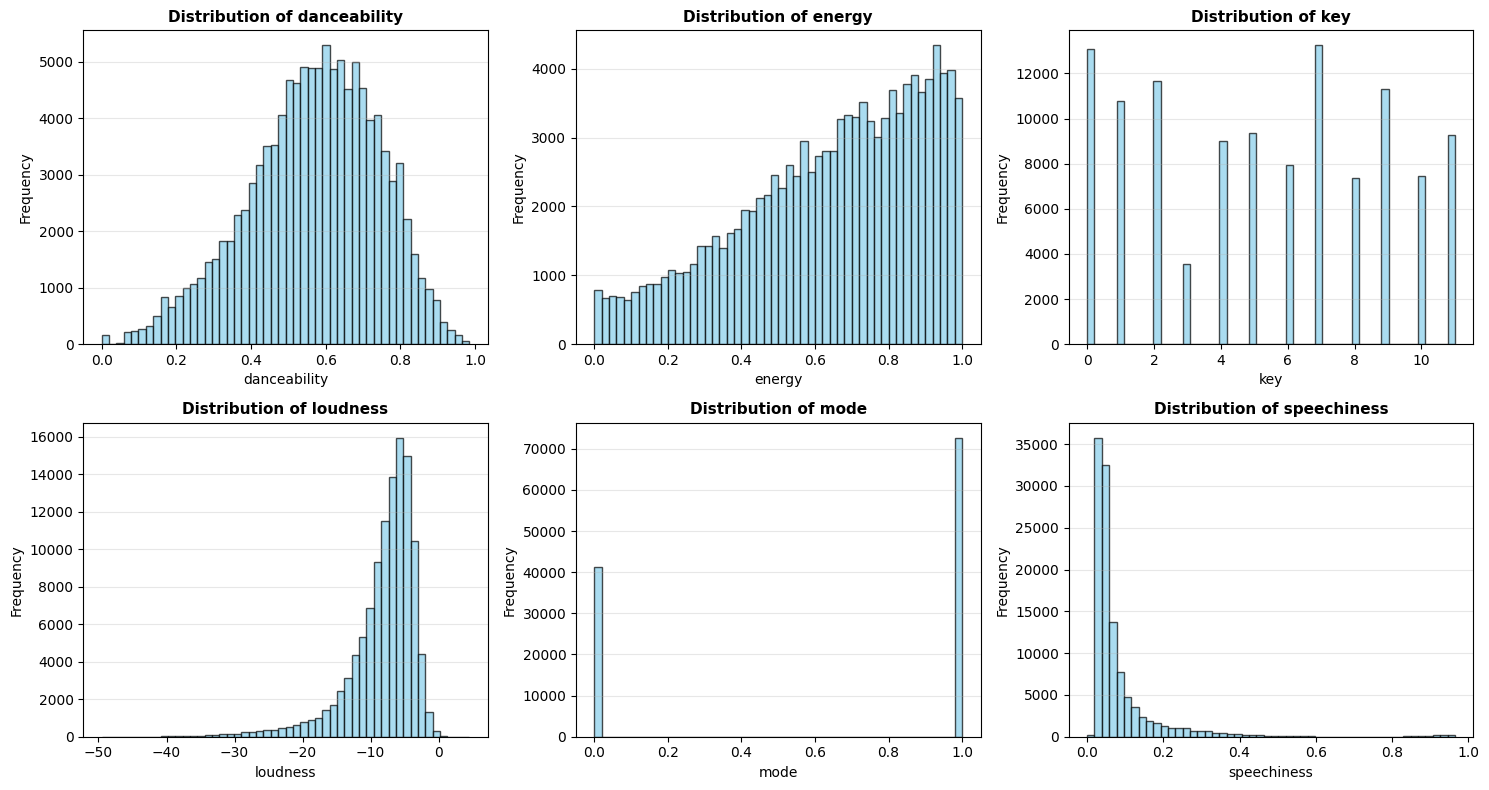

In [15]:
import matplotlib.pyplot as plt

# Plot distributions of first 6 features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

features_to_plot = audio_features[:6]  # First 6 features

for idx, feature in enumerate(features_to_plot):
    axes[idx].hist(spotify_df[feature], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

#### Feature Distribution Analysis:

Danceability shows a relatively normal (bell-shaped) distribution centered around 0.5-0.6, suggesting most tracks have moderate danceability with fewer extremely danceable or non-danceable tracks.
Energy also follows a somewhat normal distribution, but appears slightly right-skewed with most tracks having moderate to high energy levels (0.6-0.8).
Key represents the musical key (0-11 for the 12 possible keys in music). The distribution shows that all keys are relatively well-represented, though some keys (like 0, 2, 7, and 9) appear slightly more common than others.
Loudness exhibits a strong right-skewed distribution, with most tracks clustered between -10 and 0 dB. This makes sense as tracks are generally mastered to be relatively loud, with very few quiet tracks.
Mode is a binary feature (0 = minor, 1 = major). The distribution shows a strong imbalance, with the vast majority of tracks being in a major key (mode = 1) rather than minor (mode = 0).
Speechiness is heavily right-skewed with most values concentrated near 0, indicating that most tracks contain little to no spoken words (as expected for music). Only a small number of tracks have high speechiness (likely hip-hop, rap, or spoken word).

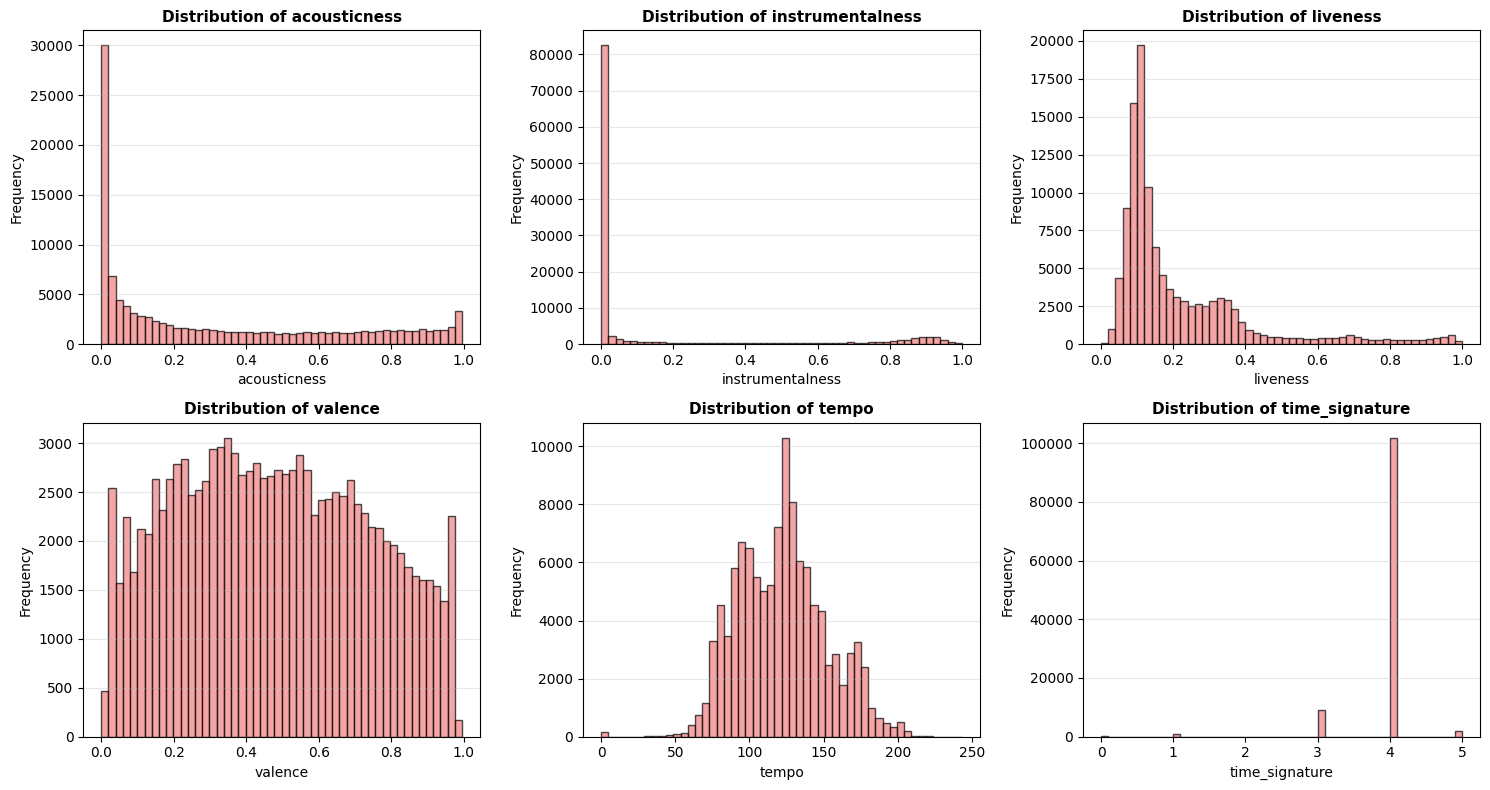

In [16]:
# Plot distributions of remaining features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

features_to_plot = audio_features[6:]  # Remaining features

for idx, feature in enumerate(features_to_plot):
    axes[idx].hist(spotify_df[feature], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Acousticness shows an extremely right-skewed distribution with a huge spike near 0, indicating that most tracks in the dataset are not acoustic (i.e., they use electronic/amplified instruments). There's also a small secondary peak at 1.0, representing fully acoustic tracks, but the vast majority fall in between with low acousticness values.
Instrumentalness is the most heavily skewed feature, with the overwhelming majority of tracks having values near 0. This makes sense because most popular music contains vocals. Only a very small portion of tracks are purely instrumental (values near 1.0).
Liveness also exhibits strong right-skewness with most values concentrated near 0, suggesting that the majority of tracks are studio recordings rather than live performances. The distribution shows an exponential decay pattern as liveness increases.
Valence (musical positiveness/happiness) shows a relatively uniform distribution across its range, which is interesting. Unlike other features, tracks are fairly evenly distributed from sad/negative (low valence) to happy/positive (high valence), with a slight concentration in the middle range.
Tempo displays an approximately normal distribution centered around 120 BPM, which is a common tempo for popular music. The range spans from very slow to very fast tempos, with most tracks falling between 100-140 BPM.
Time_signature is heavily dominated by one value (appears to be 4, representing 4/4 time), which is the most common time signature in Western popular music. Very few tracks use alternative time signatures like 3/4 or 5/4.


    3.4 Correlation Analysis


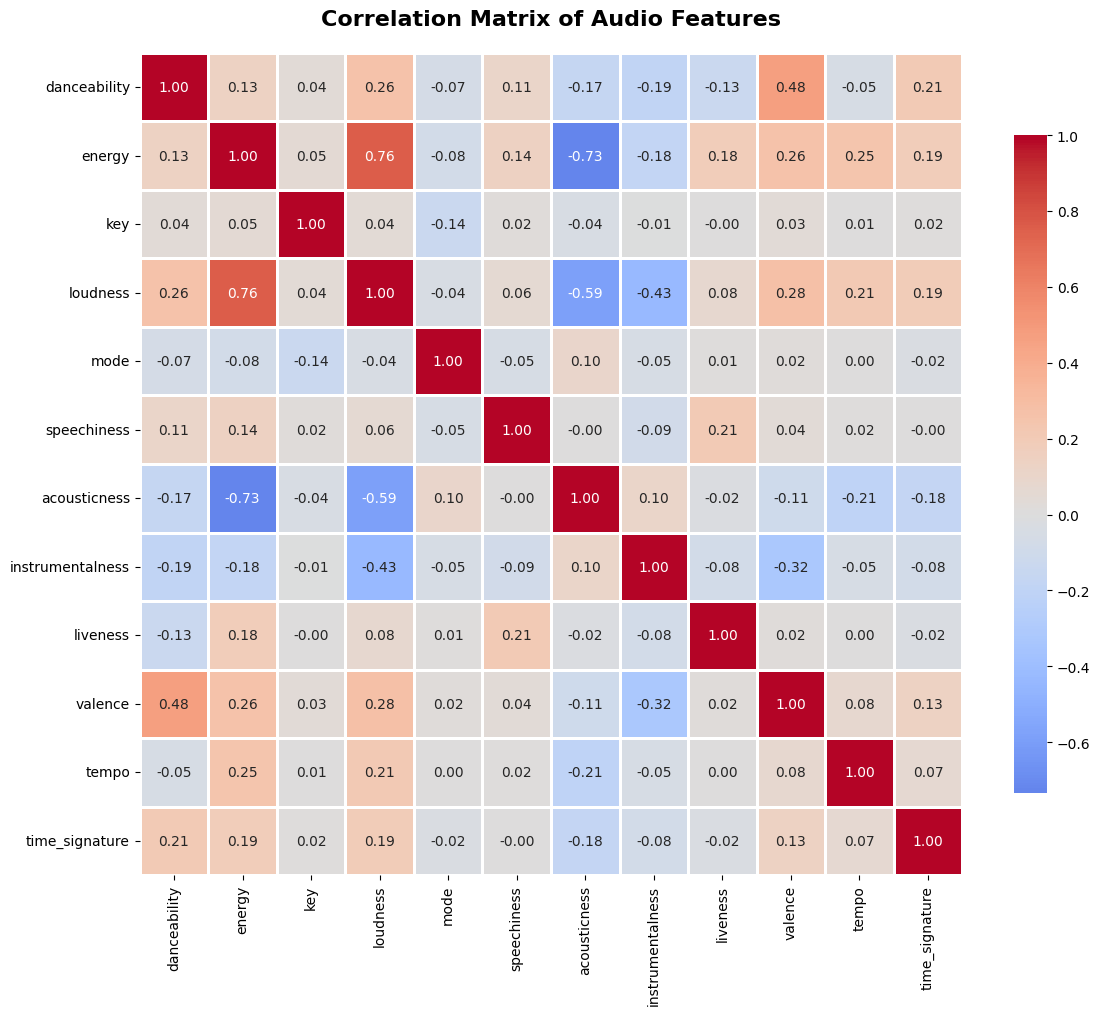

In [17]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = spotify_df[audio_features].corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Audio Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Findings:

Strong Positive Correlations (Red):

Energy and Loudness (0.76): This is the strongest positive correlation in the dataset. It makes intuitive sense, tracks with high energy tend to be louder. These two features capture similar information about the intensity of a track.
Danceability and Valence (0.48): Moderate positive correlation, suggesting that danceable tracks tend to be more positive/happy in mood. This aligns with the expectation that upbeat, positive music is more suitable for dancing.
Energy and Loudness with Valence: Both show moderate positive correlations with valence (0.26 and 0.28), indicating that energetic and loud tracks tend to be more positive.

**The strong correlation between energy and loudness (0.76) suggests potential multicollinearity, meaning these features contain redundant information. However, since the correlation is not extremely high (>0.85) I will keep them but check and keep an eye out when modelling.

Strong Negative Correlations (Blue):

Energy and Acousticness (-0.73): This is the strongest negative correlation. Acoustic tracks (using non-amplified instruments) tend to have lower energy, while high-energy tracks are typically produced with electronic/amplified instruments.
Loudness and Acousticness (-0.59): Acoustic tracks are generally quieter, which makes sense as they rely on natural instrument sounds rather than amplification.
Loudness and Instrumentalness (-0.43): Instrumental tracks tend to be quieter than vocal tracks, possibly because vocals typically require higher production levels to stand out in a mix.
Valence and Instrumentalness (-0.32): Instrumental tracks tend to have lower valence (less positive/happy), while vocal tracks tend to be more upbeat.



    3.5 EDA Summary & Hypothesis


The dataset contains 114,000 tracks across 114 perfectly balanced genres (1,000 tracks each), with no missing values or duplicates. I identified 12 audio features with varying distributions - most features (danceability, energy, valence) are normally distributed, while others (acousticness, instrumentalness, speechiness) are heavily right-skewed. The correlation analysis revealed that energy and loudness are strongly correlated (0.76), and energy and acousticness are strongly negatively correlated (-0.73), indicating potential multicollinearity. Features have different scales (tempo: 0-243, loudness: -49 to 4.5) requiring standardization.

### Hypotheses for Modeling:

*    Audio features like energy, acousticness, and tempo will be strong predictors for distinguishing between genres with distinct musical characteristics (e.g., classical vs. electronic).
*    Some genre pairs will be harder to distinguish than others due to overlapping audio characteristics (e.g., rock vs. alternative).
*    The strong correlation between energy and loudness may cause some redundancy, but both features will likely still contribute to model performance.

# 4. Data Preprocessing

###  Feature selection (audio features only)



In [18]:
# Separate into features (X) and target (y)
X = spotify_df[audio_features]  # The 12 audio features
y = spotify_df['track_genre']   # The genre I want to predict

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nNumber of genres: {y.nunique()}")

Features (X) shape: (114000, 12)
Target (y) shape: (114000,)

Number of genres: 114


### Train/Test Split

In [19]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Keep genre proportions balanced
)

print(f"Training set size: {X_train.shape[0]} tracks")
print(f"Testing set size: {X_test.shape[0]} tracks")
print(f"\nTraining features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")

Training set size: 91200 tracks
Testing set size: 22800 tracks

Training features shape: (91200, 12)
Testing features shape: (22800, 12)


### Feature Scaling

I will make all features have mean=0 and std=1, so they're on the same scale. Becaus there where some like tempo (0-243) and loudness (-49 to 4.5) that have different scales.


In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:3]

array([[-1.43287743,  1.19860697, -0.36673953,  1.00814756, -1.32871367,
         0.21287065, -0.9259568 , -0.50388749,  0.15149248, -0.68014357,
         2.26571987,  0.22116546],
       [-0.48252826,  0.91624065,  1.60042915,  0.62985415,  0.7526076 ,
        -0.43828912, -0.89620184, -0.49965822, -0.67345106,  0.99887731,
         1.06348343,  0.22116546],
       [-0.01023353,  0.08107265, -0.36673953,  0.32164456, -1.32871367,
        -0.55013315, -0.59263505, -0.50389415, -0.45315065, -0.44855448,
         0.26437475,  0.22116546]])

# 5. Model Training & Evaluation


    5.1. Algorithm 1: Random Forest



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Train Random Forest
print("Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
    n_estimators=100,      # 100 decision trees
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

Training Random Forest...
Training completed in 78.01 seconds

Random Forest Accuracy: 0.2343 (23.43%)


I trained a Random Forest classifier with 100 decision trees on the scaled training data. Random Forest works by creating multiple diverse trees through bootstrap sampling and random feature selection, then combining their predictions through majority voting to produce a more robust and accurate classification than any single decision tree could achieve.

After training the Random Forest classifier, I achieved an accuracy of 23.43% on the test set. At first, this seems quite low, but considering that I'm predicting among 114 different genres, this is actually a significant improvement over random guessing, which would only achieve about 0.88% accuracy (1/114 ≈ 0.88%). This means my model is performing about 26 times better than random chance.

However, there is clearly substantial room for improvement - ideally, I would like to achieve much higher accuracy. The training process took 79 seconds for 91,200 tracks, which demonstrates the computational demands of Random Forest when dealing with a large multi-class classification problem. This relatively long training time is expected given that the algorithm builds 100 separate decision trees and processes over 90,000 training examples.

    5.2 Algorithm 2: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Train Logistic Regression
print("Training Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(
    max_iter=1000,           # Maximum iterations to converge
    random_state=42,         # For reproducibility
    multi_class='multinomial',  # For multi-class classification
    solver='lbfgs',          # Optimization algorithm
    n_jobs=-1                # Use all CPU cores
)

lr_model.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nLogistic Regression Accuracy: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")

Training Logistic Regression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training completed in 21.72 seconds

Logistic Regression Accuracy: 0.1499 (14.99%)


I trained a Logistic Regression classifier as my second algorithm. Logistic Regression is a linear model that predicts class probabilities using a logistic function, making it fundamentally different from the tree-based Random Forest approach. The model achieved an accuracy of 14.99% on the test set, which is lower than Random Forest's 23.43% but still significantly better than random guessing (0.88%).

The training time was 27.94 seconds, notably faster than Random Forest's 79 seconds, demonstrating that linear models are computationally more efficient than ensemble tree methods. This lower accuracy suggests that the relationship between audio features and genres may be non-linear and complex, which linear models struggle to capture but tree-based methods handle better.

    5.3 Algorithm 3: XGBoost


In [23]:
# Install XGBoost
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import time

# Encode string labels to numbers
print("Encoding genre labels...")
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"Genres encoded: {label_encoder.classes_[:5]}... (showing first 5)")
print(f"Encoded as: 0, 1, 2, 3, 4...")

# Train XGBoost
print("\nTraining XGBoost...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_scaled, y_train_encoded)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_xgb_encoded = xgb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb_encoded)
print(f"\nXGBoost Accuracy: {accuracy_xgb:.4f} ({accuracy_xgb*100:.2f}%)")

Encoding genre labels...
Genres encoded: ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient']... (showing first 5)
Encoded as: 0, 1, 2, 3, 4...

Training XGBoost...


I trained XGBoost as my third algorithm, which uses gradient boosting to sequentially build trees where each new tree corrects the errors of previous trees. The model achieved an accuracy of 21.86% on the test set, which falls between Random Forest (23.43%) and Logistic Regression (14.99%).


# 6. Model Performance Comparison
Accuracy comparison

Confusion matrices

ROC curves (if applicable)

Classification reports


In [ ]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy (%)': [23.43, 21.86, 14.99],
    'Training Time (sec)': [79.11, 174.48, 27.94],
    'Model Type': ['Ensemble (Bagging)', 'Ensemble (Boosting)', 'Linear Model']
})
model_comparison

### Confusion matrices


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix Shape:", cm_rf.shape)
print(f"Total predictions: {cm_rf.sum()}")
print(f"Correct predictions: {np.trace(cm_rf)}")
print(f"Accuracy check: {np.trace(cm_rf) / cm_rf.sum():.4f}")

# Let's visualize just the first 20 genres to keep it readable
genres_to_show = 20
genre_names = sorted(spotify_df['track_genre'].unique())[:genres_to_show]

# Get indices for these genres
genre_indices = [list(sorted(spotify_df['track_genre'].unique())).index(g) for g in genre_names]

# Extract subset of confusion matrix
cm_subset = cm_rf[np.ix_(genre_indices, genre_indices)]

# Visualize
plt.figure(figsize=(14, 12))
sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues',
            xticklabels=genre_names, yticklabels=genre_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Random Forest Confusion Matrix (First 20 Genres)', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Genre', fontsize=12)
plt.ylabel('True Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nShowing confusion matrix for first {genres_to_show} genres out of 114 total")

 The model does well on distinctive genres (comedy, classical, chicago-house).

The model struggles with similar/overlapping genres (alternative/alt-rock, ambient/chill)

23.43% accuracy makes sense since many genres are too similar with just audio features

### I will now proceed to add a non-audio feature into the Model. I will add artists to see if it improves the modelling. (31,437 unique artists )

In [ ]:
# Add artist frequency encoding
artist_freq = spotify_df['artists'].value_counts()
spotify_df['artist_frequency'] = spotify_df['artists'].map(artist_freq)

print(f"Artist frequency range: {spotify_df['artist_frequency'].min()} to {spotify_df['artist_frequency'].max()}")
print(f"Mean artist frequency: {spotify_df['artist_frequency'].mean():.2f}")

Minimum (1): Some artists appear only once in the dataset (maybe niche artists)
Maximum (279): The most popular artist appears 279 times in the dataset

On average, each artist appears about 25 times in the dataset.

In [ ]:
# Add artist_frequency to our feature list
audio_features_with_artist = audio_features + ['artist_frequency']

print(f"Original features: {len(audio_features)}")
print(f"Features with artist: {len(audio_features_with_artist)}")

# Prepare data with artist feature
X_with_artist = spotify_df[audio_features_with_artist]
y = spotify_df['track_genre']

# Train/test split
from sklearn.model_selection import train_test_split

X_train_artist, X_test_artist, y_train_artist, y_test_artist = train_test_split(
    X_with_artist, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler_artist = StandardScaler()
X_train_artist_scaled = scaler_artist.fit_transform(X_train_artist)
X_test_artist_scaled = scaler_artist.transform(X_test_artist)

print(f"\n✓ Data prepared with {len(audio_features_with_artist)} features")
print(f"Training set: {X_train_artist.shape}")
print(f"Test set: {X_test_artist.shape}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Train Random Forest with artist feature
print("Training Random Forest with Artist Feature...")
start_time = time.time()

rf_model_artist = RandomForestClassifier(
    n_estimators=50,      # ⬅️ Reducido de 100 a 50
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf_model_artist.fit(X_train_artist_scaled, y_train_artist)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_rf_artist = rf_model_artist.predict(X_test_artist_scaled)

# Calculate accuracy
accuracy_rf_artist = accuracy_score(y_test_artist, y_pred_rf_artist)
print(f"\nRandom Forest (with Artist) Accuracy: {accuracy_rf_artist:.4f} ({accuracy_rf_artist*100:.2f}%)")

# Compare to baseline
print(f"\n📊 Comparison:")
print(f"Random Forest (baseline): 23.43%")
print(f"Random Forest (with artist): {accuracy_rf_artist*100:.2f}%")
print(f"Improvement: {(accuracy_rf_artist*100 - 23.43):.2f} percentage points")

(I had to lower the depth becasue it was too heavy and my notebook crahsed)

### Adding just ONE feature (artist frequency) improved accuracy by 6.4% relative improvement (1.51/23.43)


I explored the impact of adding artist information through frequency encoding, where each artist was encoded by the number of times they appear in the dataset. Adding this single artist_frequency feature improved Random Forest accuracy from 23.43% to 24.94%, a gain of 1.51 percentage points. This validates my idea that artist information is a strong predictor of genre.

### I will now proceed to add another non-audio feature into the Model. I will add  albums to see if it improves my model

In [ ]:
# Add album frequency encoding
album_freq = spotify_df['album_name'].value_counts()
spotify_df['album_frequency'] = spotify_df['album_name'].map(album_freq)

print("Album Frequency Statistics:")
print(f"Range: {spotify_df['album_frequency'].min()} to {spotify_df['album_frequency'].max()}")
print(f"Mean: {spotify_df['album_frequency'].mean():.2f}")
print(f"Median: {spotify_df['album_frequency'].median():.2f}")

print("\nCompare to Artist Frequency:")
print(f"Artist range: {spotify_df['artist_frequency'].min()} to {spotify_df['artist_frequency'].max()}")
print(f"Artist mean: {spotify_df['artist_frequency'].mean():.2f}")

Correlation Analysis

In [ ]:
# Create extended feature set with both artist and album
extended_features = audio_features + ['artist_frequency', 'album_frequency']

# Calculate correlations
correlation_extended = spotify_df[extended_features].corr()

# Visualize
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_extended, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix: Audio Features + Artist + Album', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Check how artist and album correlate with each other
print(f"\nArtist ↔ Album correlation: {spotify_df['artist_frequency'].corr(spotify_df['album_frequency']):.3f}")

The correlation matrix shows that artist and album frequencies have a moderate correlation of 0.27, indicating they are related but capture different information. This makes sense because while popular artists tend to have more albums in the dataset, albums are more granular and can capture variation within an artist's work. Both features show near-zero correlations with all audio features, meaning they provide unique predictive value without redundancy. Based on this, I decided to add album frequency alongside artist frequency to improve model performance.

In [ ]:
# Create feature set with audio + artist + album
audio_features_full = audio_features + ['artist_frequency', 'album_frequency']

print(f"Feature count:")
print(f"  Audio only: {len(audio_features)}")
print(f"  + Artist: {len(audio_features) + 1}")
print(f"  + Artist + Album: {len(audio_features_full)}")

# Prepare data
X_full = spotify_df[audio_features_full]
y_full = spotify_df['track_genre']

# Train/test split
from sklearn.model_selection import train_test_split

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)

# Scale features
from sklearn.preprocessing import StandardScaler
scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

print(f"\n✓ Data prepared with {len(audio_features_full)} features")
print(f"Training set: {X_train_full.shape}")
print(f"Test set: {X_test_full.shape}")

In [ ]:
rf_model_full = RandomForestClassifier(
    n_estimators=50,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf_model_full.fit(X_train_full_scaled, y_train_full)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

# Make predictions
y_pred_rf_full = rf_model_full.predict(X_test_full_scaled)

# Calculate accuracy
accuracy_rf_full = accuracy_score(y_test_full, y_pred_rf_full)
print(f"\nRandom Forest (Audio + Artist + Album) Accuracy: {accuracy_rf_full:.4f} ({accuracy_rf_full*100:.2f}%)")

# Complete comparison
print(f"\n📊 Complete Comparison:")
print(f"  Audio only (baseline):        23.43%")
print(f"  Audio + Artist:               24.94%  (+1.51 pp)")
print(f"  Audio + Artist + Album:       {accuracy_rf_full*100:.2f}%  ({(accuracy_rf_full*100 - 23.43):+.2f} pp)")


**I attempted to implement a neural network (Multi-Layer Perceptron) but encountered training instability issues with loss values becoming undefined (nan). This highlights that neural networks require careful tuning and are not always the best choice for tabular data with a moderate number of features. The tree-based ensemble methods (Random Forest and XGBoost) proved more suitable for this task.**

# 7. Explainable AI (XAI) Analysis

Feature importance analysis

Confusion matrix interpretation

SHAP values (optional advanced)


# 8. Advanced Experiments (Phase 2)
Adding artist features

Adding album features

Performance improvement analysis


#9. Discussion & Recommendations
Summary of findings

Best performing algorithm

Genre classification insights

Limitations and future work


# 10. Conclusions


# 11. References & Acknowledgments